# Visualizing Graphs

This example provides how to visualize graphs using the heatmap and gridplot functions.

In [1]:
import graspy

import numpy as np
%matplotlib inline

## Plotting graphs using heatmap

### Simulate graphs using weighted stochastic block models
The 2-block model is defined as below:
\begin{align*}
    P = \begin{bmatrix}
        0.8 & 0.2 \\
        0.2 & 0.8 
    \end{bmatrix}
\end{align*}

We generate two weight SBMs where the weights are distributed from a Poisson(3) and Normal(5, 1).

In [2]:
from graspy.simulations import sbm

n_communities = [50, 50]
p = [[0.8, 0.2], 
     [0.2, 0.8]]

wt = np.random.poisson
wtargs = dict(lam=3)
A_poisson= sbm(n_communities, p, wt=wt, wtargs=wtargs)

wt = np.random.normal
wtargs = dict(loc=5, scale=1)
A_normal = sbm(n_communities, p, wt=wt, wtargs=wtargs)

## Plot the simulated weighted SBMs

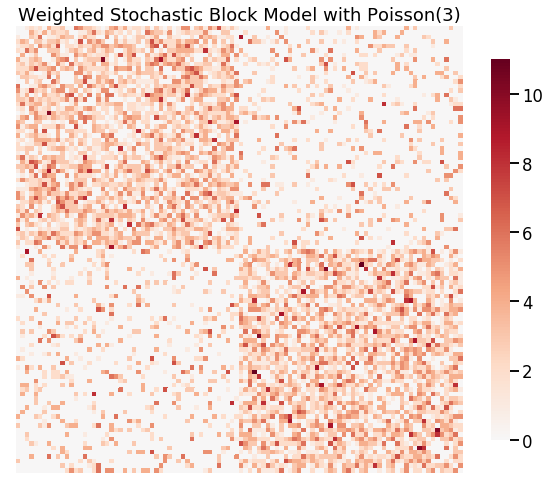

In [3]:
from graspy.plot import heatmap

title = 'Weighted Stochastic Block Model with Poisson(3)'

fig= heatmap(A_poisson, title=title)

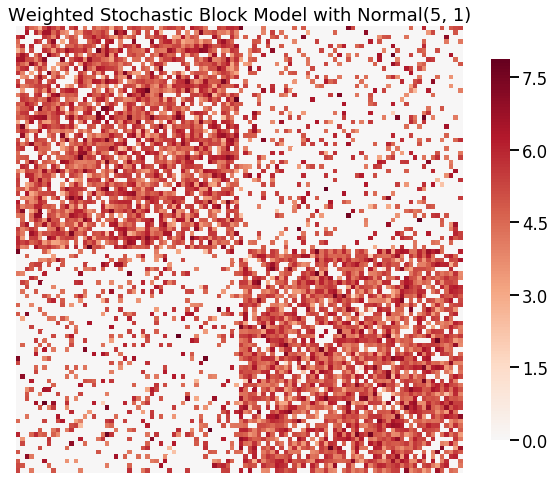

In [4]:
title = 'Weighted Stochastic Block Model with Normal(5, 1)'

fig= heatmap(A_normal, title=title)

### You can also change color maps

See [here](https://matplotlib.org/tutorials/colors/colormaps.html) for a list of colormaps

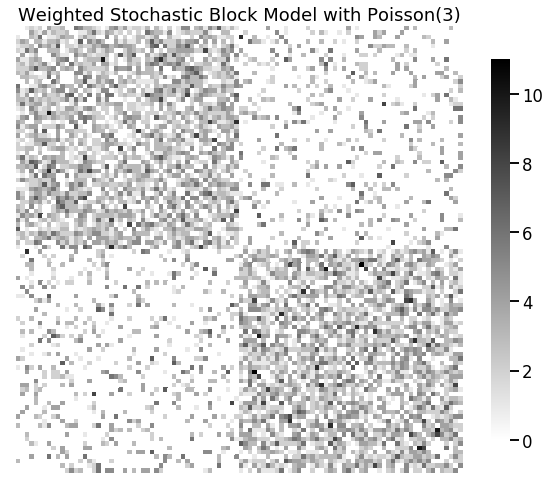

In [5]:
title = 'Weighted Stochastic Block Model with Poisson(3)'

fig= heatmap(A_poisson, title=title, transform=None, cmap="binary", center=None)

## Data transformations

When your graphs have values that span a large range, it is often useful to transform the data in order to visualize the data properly. Below, we use a real graph that is estimated from the a structural MRI scan. The data is provided by [HNU1](http://dx.doi.org/10.15387/fcp_indi.corr.hnu1). 

The data ranges from 0 to 44813, and visuzliating without transformation will emphsize the large weights. Both log and pass-to-ranks transform provide a better visualization of the graph.

In [6]:
G = np.load('./data/sub-0025427_ses-1_dwi_desikan.npy')

print((np.min(G), np.max(G)))

(0.0, 44813.0)


### Without transform

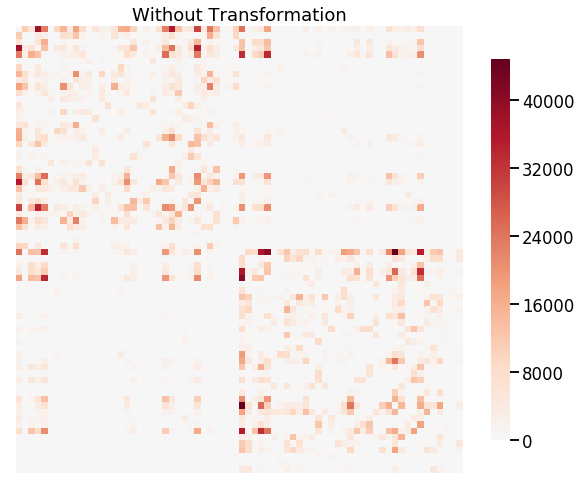

In [7]:
title = 'Without Transformation'
fig= heatmap(G, title=title, transform=None)

### With log transform

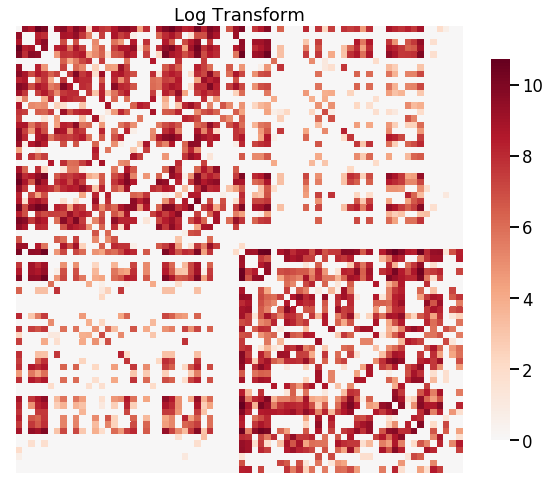

In [8]:
title = 'Log Transform'
fig= heatmap(G, title=title, transform='log')

### With pass to ranks

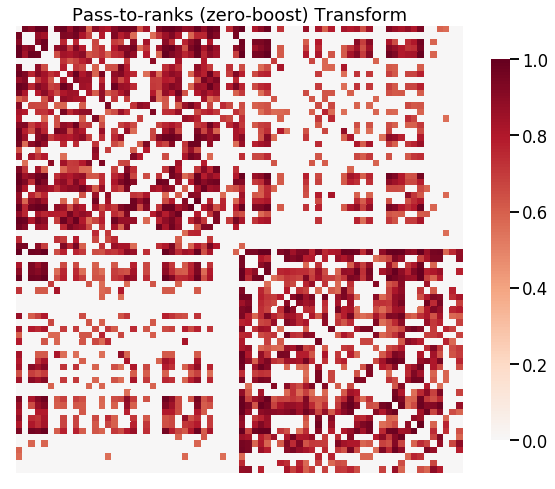

In [9]:
title = 'Pass-to-ranks (zero-boost) Transform'
fig= heatmap(G, title=title, transform='zero-boost')

## Overlaying two sparse graphs using gridplot

### Simulate more graphs using weighted stochastic block models
The 2-block model is defined as below:
\begin{align*}
    P = \begin{bmatrix}
        0.25 & 0.05 \\
        0.05 & 0.25
    \end{bmatrix}
\end{align*}

We generate two weighted SBMs where the weights are distributed from a discrete uniform(1, 10) and discrete uniform(2, 5).

In [10]:
n_communities = [50, 50]
p = np.array([[0.25, 0.05], [0.05, 0.25]])
wt = np.random.randint
wtargs = dict(low=1, high=10)

np.random.seed(1)
A_unif1= sbm(n_communities, p, wt=wt, wtargs=wtargs)

wtargs = dict(low=2, high=5)
A_unif2= sbm(n_communities, p, wt=wt, wtargs=wtargs)

## Visualizing both graphs

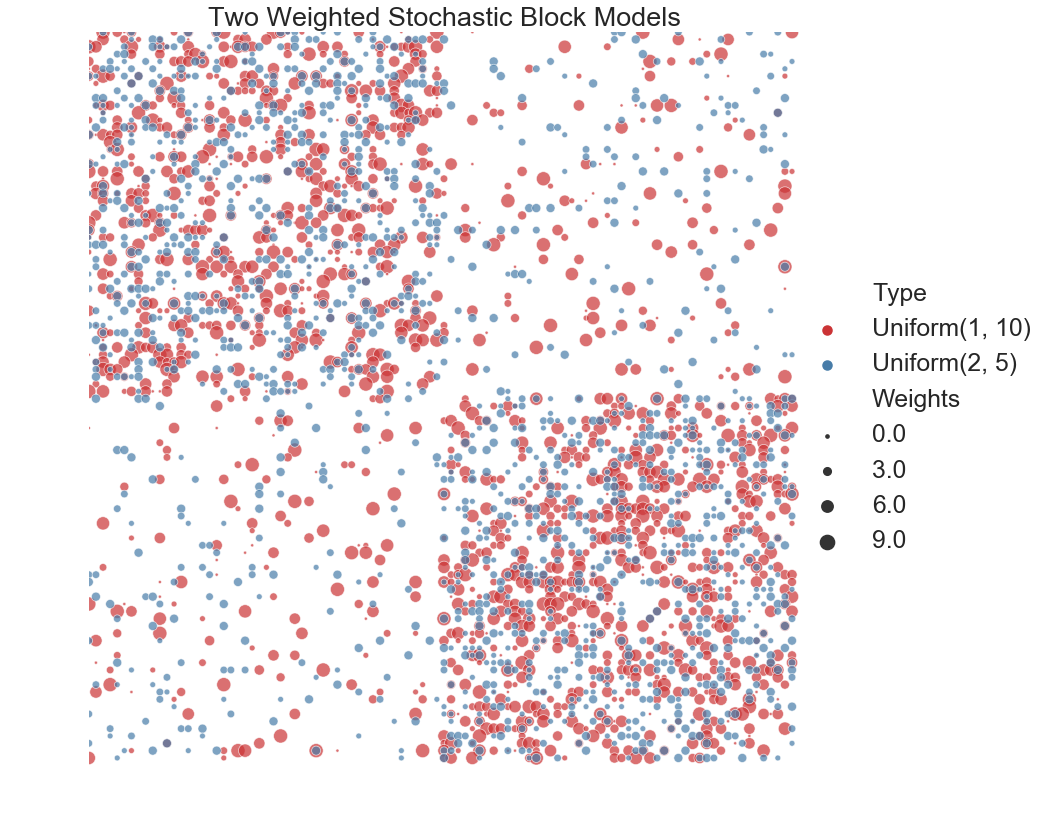

In [11]:
from graspy.plot import gridplot

X = [A_unif1, A_unif2]
labels = ["Uniform(1, 10)", "Uniform(2, 5)"]

f = gridplot(X=X, labels=labels, 
                   title='Two Weighted Stochastic Block Models', height=12, font_scale=1.5)